In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
data= pd.read_csv("bank_full1.csv")

In [3]:
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [4]:
data.tail().T

,45206,45207,45208,45209,45210
age,51,71,72,57,37
job,technician,retired,retired,blue-collar,entrepreneur
marital,married,divorced,married,married,married
education,tertiary,primary,secondary,secondary,secondary
default,no,no,no,no,no
balance,825,1729,5715,668,2971
housing,no,no,no,no,no
loan,no,no,no,no,no
contact,cellular,cellular,cellular,telephone,cellular
day,17,17,17,17,17


In [5]:
data.shape

(45211, 17)

In [6]:
np.std(data, ddof=0)

age           10.618645
balance     3044.732156
day            8.322384
duration     257.524964
campaign       3.097987
pdays        100.127639
previous       2.303416
dtype: float64

In [7]:
data.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [8]:
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [9]:
data.tail().T

,45206,45207,45208,45209,45210
age,51,71,72,57,37
job,technician,retired,retired,blue-collar,entrepreneur
marital,married,divorced,married,married,married
education,tertiary,primary,secondary,secondary,secondary
default,no,no,no,no,no
balance,825,1729,5715,668,2971
housing,no,no,no,no,no
loan,no,no,no,no,no
contact,cellular,cellular,cellular,telephone,cellular
day,17,17,17,17,17


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [11]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [13]:
cat_col =[n for n in data.columns if data[n].dtypes == 'object']

In [14]:
for col in cat_col:
    print(col,'\n\n')
    print(data[col].value_counts())
    print('==============='*4)

job 


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital 


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education 


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default 


no     44396
yes      815
Name: default, dtype: int64
housing 


yes    25130
no     20081
Name: housing, dtype: int64
loan 


no     37967
yes     7244
Name: loan, dtype: int64
contact 


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month 


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
poutcome 


unkno

In [15]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

Percentage of subscription: 11.698480458295547
Percentage of no subcription: 88.30151954170445


<AxesSubplot:>

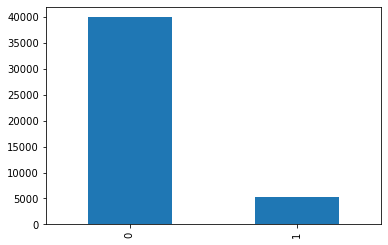

In [16]:
no_sub = len(data[data['y']==0])
sub = len(data[data['y']==1])
percent_no_sub =(no_sub/len(data['y']))*100
percent_sub = (sub/len(data['y']))*100
print('Percentage of subscription:',percent_sub)
print('Percentage of no subcription:',percent_no_sub)

data['y'].value_counts().plot.bar()

# Visualization

In [17]:
import matplotlib.pyplot as plt

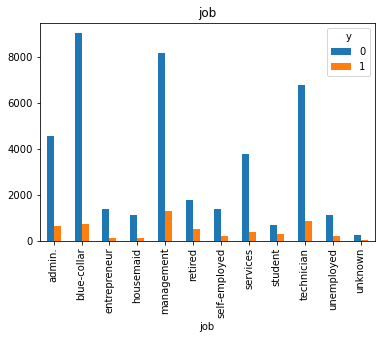

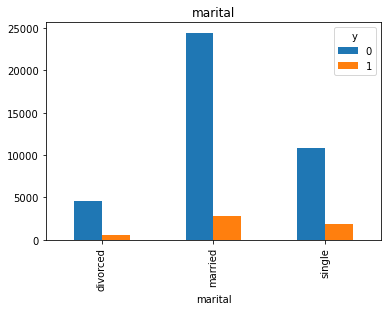

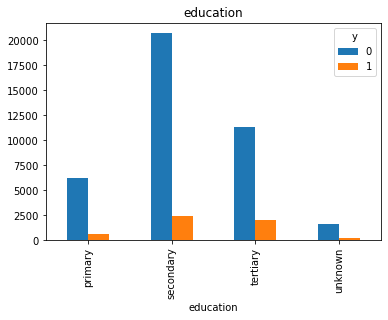

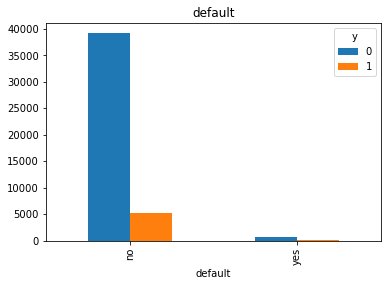

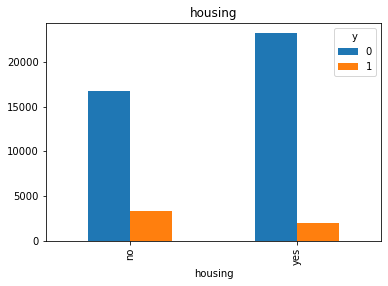

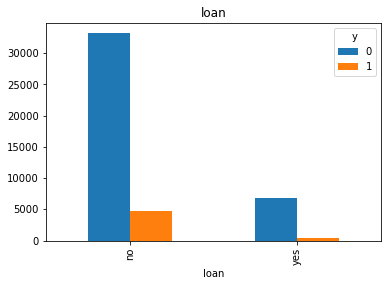

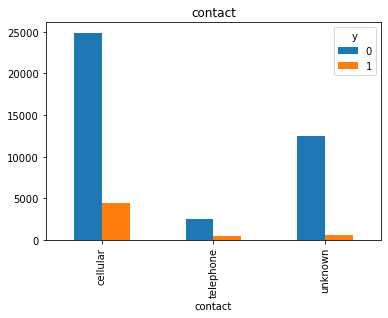

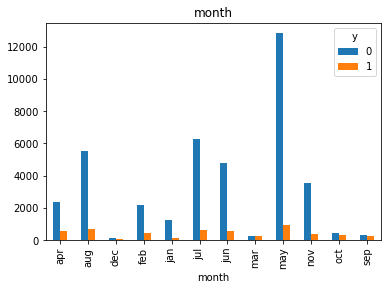

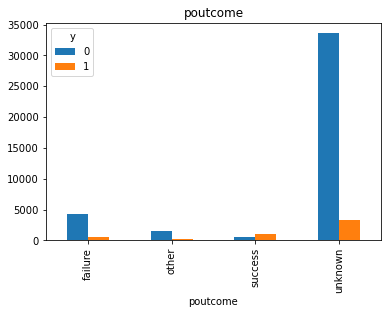

In [18]:
for col in cat_col:
    pd.crosstab(data[col],data.y).plot(kind='bar')
    plt.title(col)

In [19]:
import seaborn as sns
sns.set_style('darkgrid')

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

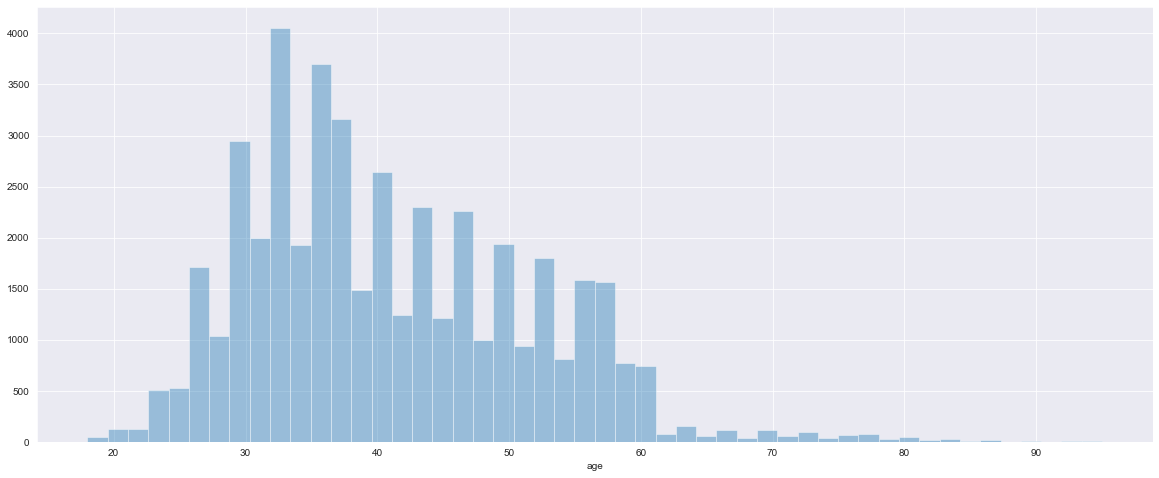

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(a=data['age'],kde =False)

# Feature Engineering

In [21]:
data = pd.get_dummies(data,drop_first= True)

In [22]:
data.shape

(45211, 43)

# Processing

In [23]:
from sklearn.utils import resample

In [24]:
X = data.loc[:,data.columns != 'y']
y = data.loc[:,data.columns == 'y']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =0)

In [27]:
print('shape of X_train :',len(X_train),'\nshape Of y_train :',len(y_train))
print('Shape of X_test:',len(X_test),'\nShape of y_test:',len(y_test))

shape of X_train : 31647 
shape Of y_train : 31647
Shape of X_test: 13564 
Shape of y_test: 13564


In [28]:
X = pd.concat([X_train,y_train],axis=1)
no_sub =X[X['y']==0]
sub = X[X['y']==1]
sub_upsampled = resample(sub,replace= True,n_samples =len(no_sub),random_state =0)
upsampled =pd.concat([no_sub,sub_upsampled])

In [29]:
upsampled['y'].value_counts()

1    27953
0    27953
Name: y, dtype: int64

In [30]:
X_train = upsampled.loc[:,upsampled.columns != 'y']
y_train = upsampled.loc[:,upsampled.columns == 'y']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Modeling

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8367438199835439

In [35]:
clf.score(X_test,y_test)

0.8400914184606311

In [36]:
y_pred =clf.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10094,  1875],
       [  294,  1301]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     11969
           1       0.41      0.82      0.55      1595

    accuracy                           0.84     13564
   macro avg       0.69      0.83      0.72     13564
weighted avg       0.91      0.84      0.86     13564



In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold =roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y_test,y_pred)


plt.plot(fpr,tpr,color='red',label='logit model (area = %0.2f'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel=('False positive rate')
plt.ylabel=('True positive rate')

NameError: name 'classifier' is not defined